# Machine Learning: Data Analysis and Supervised Learning

## Introduction
This notebook focuses on data analysis, visualization, and the implementation of key supervised learning algorithms using various datasets.

## Contents

1. **Exploratory Data Analysis**
   - Dataset: Credit data
   - Techniques: Data visualization and statistical analysis

2. **Linear Regression**
   - Dataset: Auto MPG
   - Task: Predicting vehicle fuel efficiency

3. **Logistic Regression**
   - Dataset: NBA Rookie Stats
   - Task: Player classification based on statistics

4. **Support Vector Machines (SVM)**
   - Dataset: Breast Cancer
   - Task: Binary classification for diagnosis

Each section demonstrates the process of working with real-world data, from initial exploration to model implementation and evaluation. This notebook showcases practical applications of fundamental machine learning concepts and techniques.

### Preparation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
pd.options.mode.chained_assignment = None

## 1. Exploratory Data Analysis


### Histograms:
Best suited for analyzing *distributions* of continuous variables and identifying frequency patterns.

**Evaluation**: Credit amounts peak around 1250, ages cluster 25-40, and loan durations typically under 25 days.

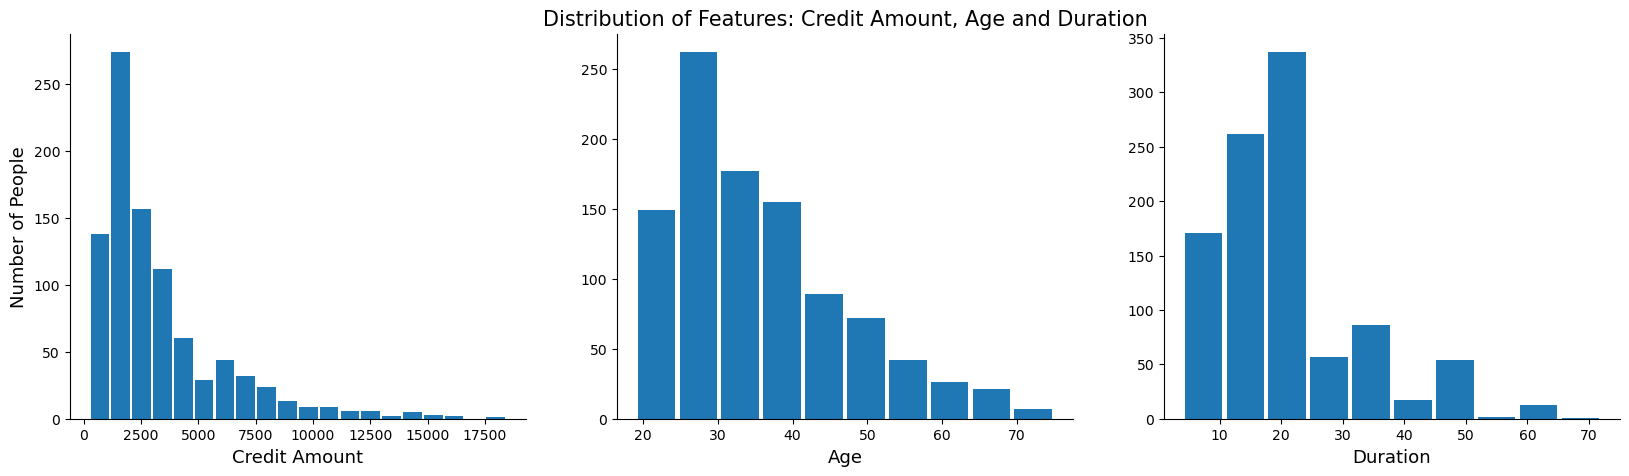

In [5]:
credits = pd.read_csv('dataset_credit.csv')

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].hist(credits['credit_amount'],rwidth=0.9, bins= 20)
ax[1].hist(credits['age'],rwidth=0.9 )
ax[2].hist(credits['duration'],rwidth=0.9)

ax[0].set_xlabel('Credit Amount',fontsize='13')
ax[0].set_ylabel('Number of People',fontsize='13')
ax[1].set_xlabel('Age',fontsize='13')
ax[2].set_xlabel('Duration',fontsize='13')
for axes in ax:
    sns.despine(ax=axes)
ax[1].set_title('Distribution of Features: Credit Amount, Age and Duration',fontsize='15')

plt.show()

#### Boxplots:
Ideal for *comparing* distributions across categories and visualizing data spread, including outliers.

**Evaluation**: Bad credit cases show higher variability and outliers, while good credit clusters tighter around the median with less volatility.

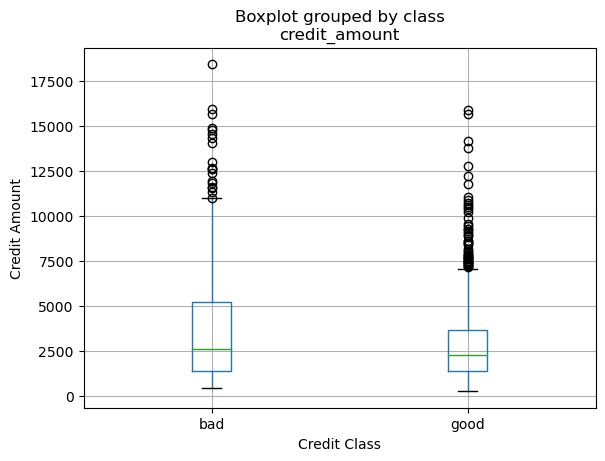

In [6]:

boxplot = credits.boxplot(column=['credit_amount'], by='class')
boxplot.set_xlabel('Credit Class')
boxplot.set_ylabel('Credit Amount')
plt.show()

### Pie charts:

Excellent for displaying *proportions* of categorical data and showing composition of a whole.

**Evaluation**: Over two-thirds of borrowers classified as good credit, indicating a generally healthy lending portfolio.

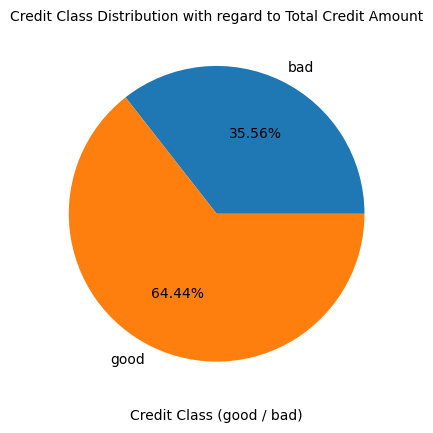

In [7]:

pieplot = credits['credit_amount'].groupby(credits['class']).sum().plot.pie(y='class',label='', autopct='%.2f%%')
pieplot.set_xlabel('Credit Class (good / bad)')
pieplot.set_title('Credit Class Distribution with regard to Total Credit Amount', fontsize=10)
plt.show()

## 2. Linear Regression

### 2.1 Assumptions of Linear Regression

Check if the assumptions of linear regression are not violated.

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

[Auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [10]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [11]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

In [12]:
auto_mpg_X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


#### Scatter Plot

Relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration).

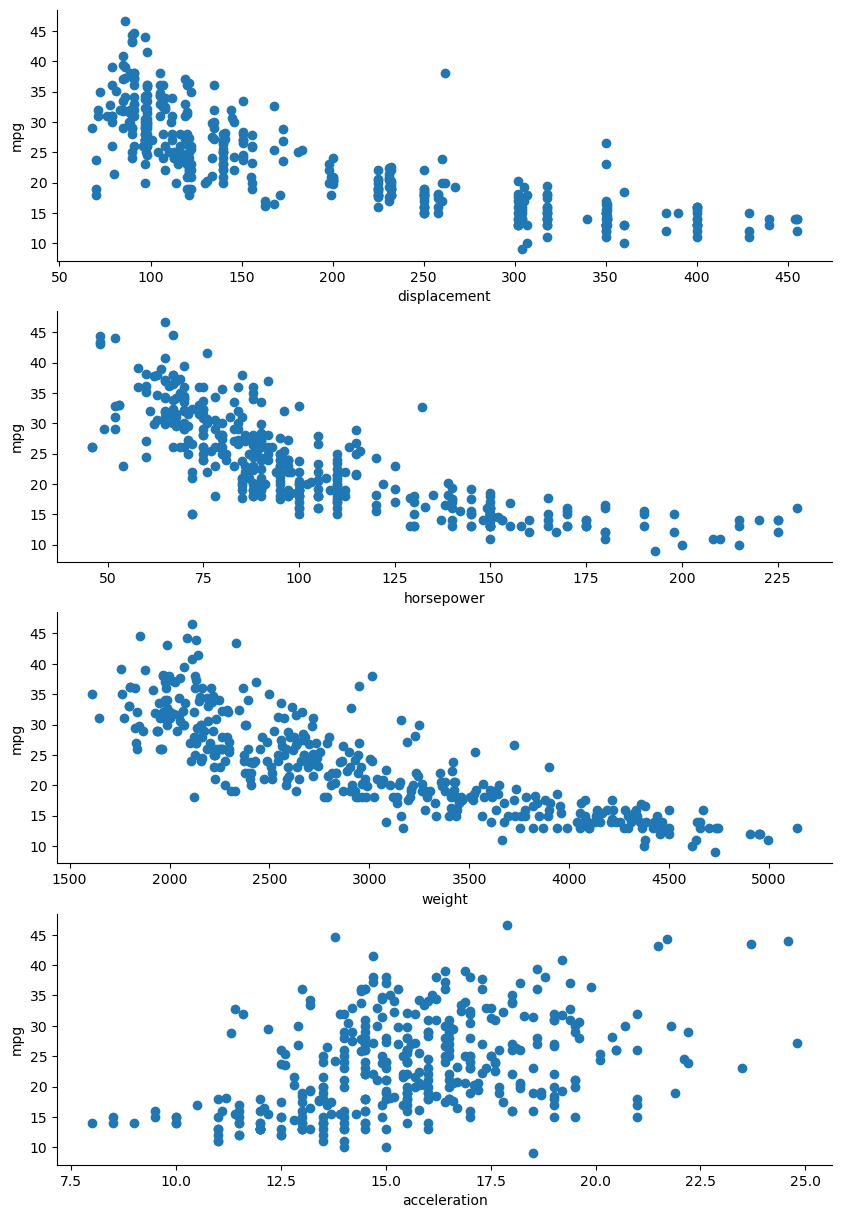

In [13]:
fig, ax = plt.subplots(4,1, figsize=(10,15))
ax[0].scatter(auto_mpg_X['displacement'], auto_mpg_y)
ax[0].set_xlabel('displacement')
ax[0].set_ylabel('mpg')

ax[1].scatter(auto_mpg_X['horsepower'], auto_mpg_y)
ax[1].set_xlabel('horsepower')
ax[1].set_ylabel('mpg')

ax[2].scatter(auto_mpg_X['weight'], auto_mpg_y)
ax[2].set_xlabel('weight')
ax[2].set_ylabel('mpg')

ax[3].scatter(auto_mpg_X['acceleration'], auto_mpg_y)
ax[3].set_xlabel('acceleration')
ax[3].set_ylabel('mpg')

for axes in ax:
    sns.despine(ax=axes)

#### Box Plot

Relationships between the label (mpg) and the discrete features (cylinders, model year, origin).

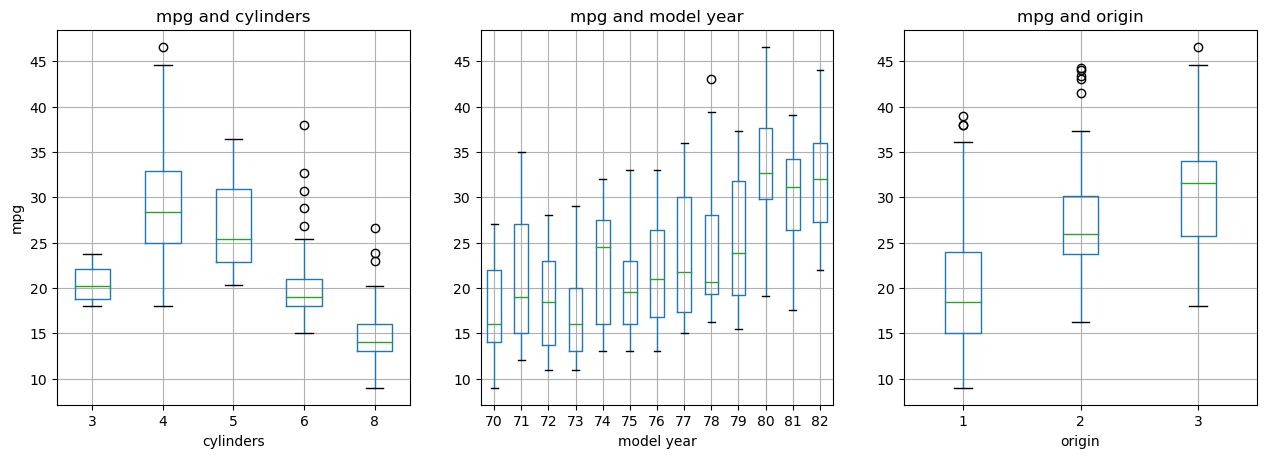

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
auto_mpg_df.boxplot(column=['mpg'], by='cylinders', ax=ax[0])
auto_mpg_df.boxplot(column=['mpg'], by='model year',ax=ax[1])
auto_mpg_df.boxplot(column=['mpg'], by='origin',ax=ax[2])


ax[0].set_ylabel('mpg')
ax[0].set_title('mpg and cylinders')
ax[1].set_title('mpg and model year')
ax[2].set_title('mpg and origin')
plt.suptitle('')
plt.show()

### 2.2 Data Preprocessing

1. Categorical encoding: Ensures all features are numeric, typically using one-hot encoding for nominal variables or ordinal encoding where applicable.

2. Data splitting (60/20/20): Provides separate sets for training, hyperparameter tuning, and final evaluation, reducing overfitting risk.

3. Standardization: 
   - Centers features at zero mean and unit variance
   - Applies train set parameters to all sets, preventing data leakage
   - Improves numerical stability and ensures feature scale doesn't affect regularization

4. Adding ones column: Allows implicit learning of the bias term within the weight vector, simplifying the hypothesis function and implementation.

In [16]:
# 1. Encode categorical features 
# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)),auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])

[[ 1.          0.37998163  0.39492947  0.1100916   0.8241919   0.28262047
  -0.57603817 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -0.87531843 -1.20346504 -0.54674887
  -0.02809942  0.43433043]
 [ 1.          1.59800495  1.33761402  1.37704734  1.02260224 -1.159761
  -0.85000755 -0.77559006]
 [ 1.         -0.83804168 -0.5173459  -0.48115442 -0.53443504 -0.00585582
   1.34174745 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -1.49471902 -1.0244118   2.15771638
   1.06777808  0.43433043]] 

 135    18.0
197    29.0
89     15.0
338    27.2
325    44.3
Name: mpg, dtype: float64


### 2.3 Implement (Ridge) Linear Regression

The ridge regression model extends linear regression by adding L2 regularization. Its hypothesis function is y = Xw, where X includes a column of ones for the bias term. The objective is to minimize the loss function:

`min_w ||Xw - y||^2_2 + α||w||^2_2`

This balances prediction accuracy (`||Xw - y||^2_2`) with model simplicity `(`α||w||^2_2`). The regularization parameter α controls model complexity, with α = 0 reverting to standard linear regression.

Ridge regression has a closed-form solution:

`w = (X^T X + αI)^-1 X^T y`

This allows direct computation of optimal weights without iterative methods like gradient descent.

`LinearRegression` class

In [17]:
from re import I


class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        
        #using Normal Equations to get optimal w
        self.w =  np.linalg.inv(X.T.dot(X) + self.alpha * I ).dot(X.T).dot(y)
       
            
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        
        return X.dot(self.w)
        

### 2.4 Train,  Evaluate, and Interpret Linear Regression Model

In [20]:
ridge = LinearRegression()
ridge.train(auto_mpg_X_train, auto_mpg_y_train)
auto_mpg_y_predict = ridge.predict(auto_mpg_X_test)
auto_mpg_y_hat_train = ridge.predict(auto_mpg_X_train)
auto_mpg_y_hat_val = ridge.predict(auto_mpg_X_val)

print("### Mean-squared error ###")
print("training set| validation set | test set")
print("%f | %f | %f" % (np.square(np.subtract(auto_mpg_y_train,auto_mpg_y_hat_train)).mean(), 
np.square(np.subtract(auto_mpg_y_val,auto_mpg_y_hat_val)).mean(), 
np.square(np.subtract(auto_mpg_y_test,auto_mpg_y_predict)).mean()))
print("")

print("### Result Comparison ###")
print("--- First Three ---")
print("predicted | actual")
for i in range(3):
    print("%f | %f"  % (auto_mpg_y_predict[i], auto_mpg_y_test.iloc[i]))    
print("--- Last Three ---")
for i in range(-3, 0, 1):
    print("%f | %f"  % (auto_mpg_y_predict[i], auto_mpg_y_test.iloc[i]))


### Mean-squared error ###
training set| validation set | test set
10.670584 | 12.944799 | 10.881879

### Result Comparison ###
--- First Three ---
predicted | actual
26.354685 | 28.000000
25.491336 | 22.300000
10.158772 | 12.000000
--- Last Three ---
26.859467 | 26.000000
21.859529 | 19.200000
32.032226 | 31.500000


#### 2.4.1 Baseline Model

The baseline model using the mean of training labels as a constant prediction serves as a fundamental performance benchmark. It represents the variance of the target variable and establishes a minimum threshold for model effectiveness. A high baseline MSE indicates significant variability in MPG, suggesting potential for predictive modeling. Effective regression models should substantially outperform this baseline across all datasets. This approach is valuable for contextualizing model performance and detecting overfitting, particularly when a model shows minimal improvement over the baseline on test data despite significant gains on training data.

In [21]:
#baseline
auto_mpg_y_base = auto_mpg_y_train.mean()
print("### Mean-squared error (Baseline)###")
print("training set| validation set | test set")
print("%f | %f | %f" % (np.square(np.subtract(auto_mpg_y_train,auto_mpg_y_base)).mean(), 
np.square(np.subtract(auto_mpg_y_val,auto_mpg_y_base)).mean(), 
np.square(np.subtract(auto_mpg_y_test,auto_mpg_y_base)).mean()))
print("")

### Mean-squared error (Baseline)###
training set| validation set | test set
60.564615 | 60.479889 | 62.461605



#### 2.4.2 Weight Analysis

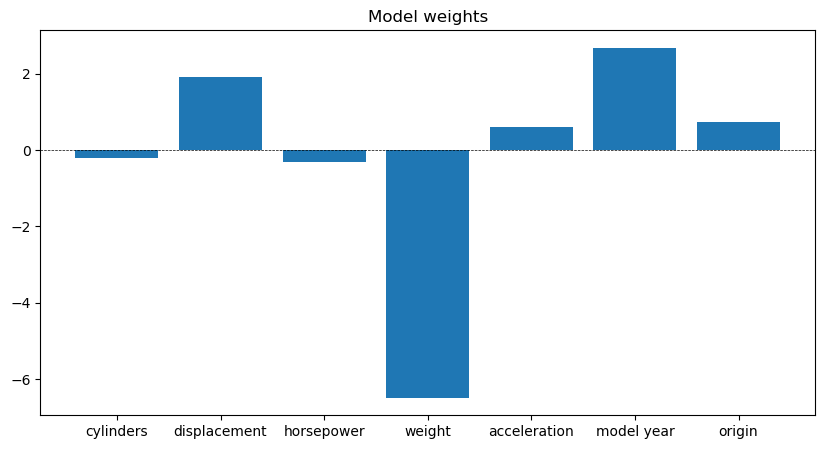

In [22]:
auto_mpg_features = list(auto_mpg_X.columns)
feature_weights = ridge.w[1:]

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(auto_mpg_features, feature_weights)
ax.axhline(color='black', linewidth='0.5', linestyle='--')
ax.set_title('Model weights')
plt.show()

**Analysis**:

- Weight: Strong negative impact on MPG (heavier vehicles are less fuel-efficient)
- Year: Positive correlation (newer models tend to have better MPG)
- Displacement: Negative effect (larger engines generally reduce MPG)

#### 2.4.3 Hyperparameter Tuning: Optimizing Ridge Regression

1. Methodology: Logarithmic α range (10^-5 to 10^1), custom LinearRegression implementation
2. Evaluation: Training and validation MSE calculated for each α
3. Visualization: Log-scale plot of α vs. MSEs

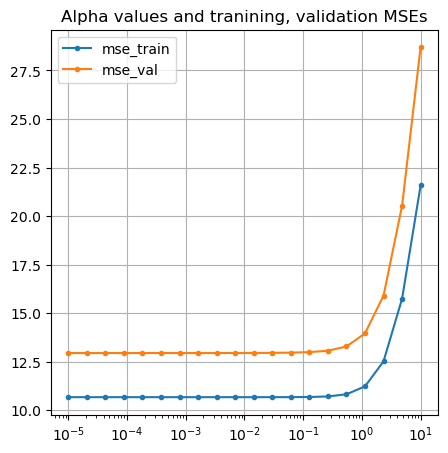

In [23]:
alphas = np.logspace(-5,1,20)
results = []

for alpha in alphas:
    ridge_test = LinearRegression(alpha)
    ridge_test.train(auto_mpg_X_train, auto_mpg_y_train)
    auto_mpg_y_hat_train = ridge_test.predict(auto_mpg_X_train)
    auto_mpg_y_hat_val = ridge_test.predict(auto_mpg_X_val)
    mse_train = np.square(np.subtract(auto_mpg_y_train,auto_mpg_y_hat_train)).mean()
    mse_val = np.square(np.subtract(auto_mpg_y_val,auto_mpg_y_hat_val)).mean()
    results.append([alpha, mse_train, mse_val])

results = np.asarray(results)
fig,ax = plt.subplots(figsize=(5,5))
ax.set_xscale('log')
ax.plot(results[:,0], results[:,1], marker='.', label='mse_train')
ax.plot(results[:,0], results[:,2], marker='.', label='mse_val')
ax.set_title('Alpha values and tranining, validation MSEs')

plt.legend()
plt.grid()
plt.show()

**Analysis**:

The relationship between α and MSE reveals key insights about the Ridge Regression model's behavior on the auto MPG dataset:

- Stability range: 
  
  For α < 10^0, both training and validation MSEs remain relatively constant.
Performance degradation: As α approaches 10^1, both MSEs increase sharply.


- Low α range (α < 10^0):

  Minimal regularization effect
Model behaves similarly to ordinary least squares
Suggests dataset may not be prone to overfitting in this range


- High α range (α > 10^0):

  Strong regularization forces coefficients towards zero
Model becomes oversimplified (underfitting)
Leads to poor performance on both training and validation sets


- Optimal α:

  Likely lies near 10^0
Balances bias-variance tradeoff
Provides best generalization without oversimplifying the model



The lack of overfitting at lower α values indicates that the auto MPG dataset may have a favorable signal-to-noise ratio or that the features are already well-suited to the prediction task without requiring strong regularization.

## 3. Logistic Regression

Logistic Regression on NBA rookie stats (1340x21) to predict if player will last 5 years in league

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5

In [24]:
nba_reg = pd.read_csv("nba_logreg.csv")
nba_reg.head()
nba_reg.shape

(1340, 21)

### 3.1 EDA

#### 3.1.1 Missing Value Analysis

In [25]:
nba_reg.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [26]:
nba_reg_new = nba_reg.dropna()

#### 3.1.2 Pie Chart

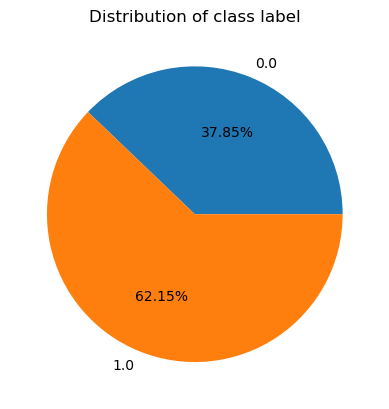

In [27]:
# Your code here
fig, ax = plt.subplots()
ax = nba_reg_new.groupby(nba_reg_new['TARGET_5Yrs'])['TARGET_5Yrs'].count().plot.pie(label='',autopct='%.2f%%')
ax.set_title('Distribution of class label')
plt.show()

In [28]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']

#### 3.1.3 Correlation Matrix

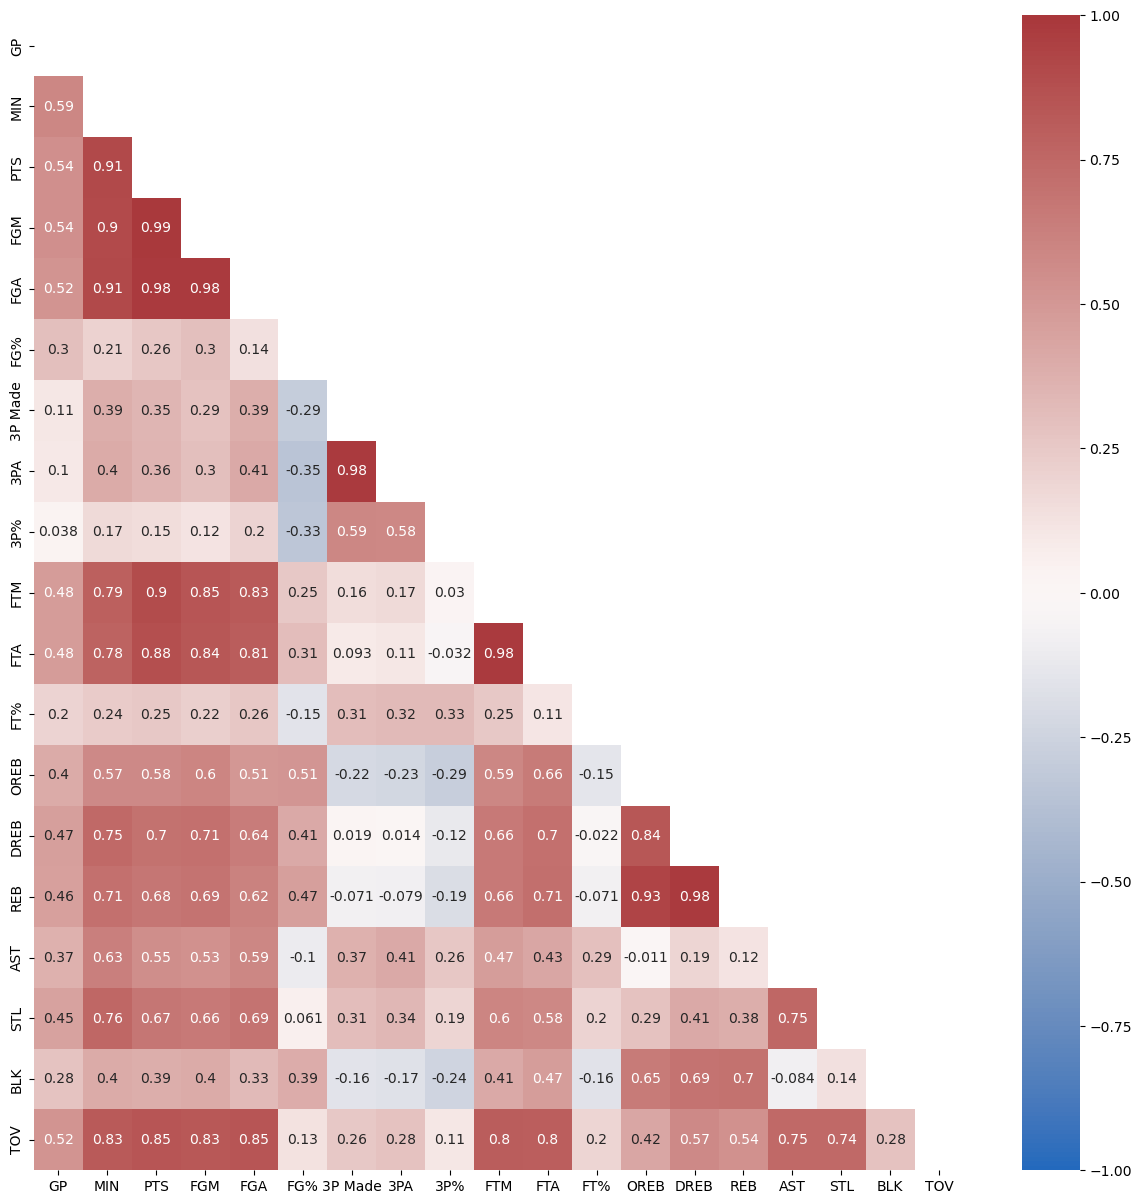

In [29]:
nba_X_corr = nba_X.drop(columns=['Name'])

#reference: https://datagy.io/python-correlation-matrix/
fig,ax = plt.subplots(figsize=(15,15))
matrix = nba_X_corr.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
ax = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag',mask = mask)
plt.show()

In [30]:
#drop one of the highly correlated features
#reference: https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/
upper = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool))
high_corr = [col for col in upper.columns if any(upper[col] >= 0.9)]
nba_X_dropped = nba_X_corr.drop(columns=high_corr)

# nba_X_new.shape

### 3.2 Data Preprocessing

1. Label Encoding
   Implement OrdinalEncoding to convert categorical labels (male & female) into numerical format. This step is crucial for preparing the target variable for binary classification.

2. Label Vector Transformation
   Transform the encoded label from a Pandas series to a Numpy (m x 1) vector. This ensures compatibility with most machine learning libraries and prevents potential issues during model implementation, particularly for logistic regression.

3. Data Splitting
   Partition the dataset into training (60%), validation (20%), and test (20%) sets. This division allows for robust model training, hyperparameter tuning, and unbiased performance evaluation.

4. Feature Standardization
   Standardize the feature matrices to ensure all variables are on the same scale. To prevent data leakage:
   - Compute standardization parameters (mean, standard deviation) using only the training set.
   - Apply these parameters to transform the training, validation, and test sets.
   This approach maintains the integrity of the validation and test sets as truly unseen data.

5. Bias Term Addition
   Augment the feature matrices of all datasets (train, validation, test) with a column of ones. This technique allows the model to learn an intercept term, enhancing its flexibility in fitting the decision boundary.


In [31]:
# Split data into features and labels

# nba_new_X = nba_reg_new.drop(columns=['TARGET_5Yrs', 'Name'])
nba_new_X = nba_X_dropped
nba_new_Y = nba_reg_new['TARGET_5Yrs']
# print(nba_new_Y)
# # print(nba_new_X.head)

In [32]:
# 1. ignored

# 2. PD series to vecotr
nba_new_Y = np.array(nba_new_Y).reshape(-1,1)

# 3. Splitting the dataset int
nba_new_X_dev, nba_new_X_test, nba_new_Y_dev, nba_new_Y_test = train_test_split(nba_new_X, nba_new_Y, test_size=0.2, random_state=0)
nba_new_X_train, nba_new_X_val, nba_new_Y_train, nba_new_Y_val = train_test_split(nba_new_X_dev, nba_new_Y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices. 
scaler1 = StandardScaler()
nba_new_X_train = scaler1.fit_transform(nba_new_X_train)
nba_new_X_val = scaler1.transform(nba_new_X_val)
nba_new_X_test = scaler1.transform(nba_new_X_test)

# 5. Add a column of ones
nba_new_X_train = np.hstack([np.ones((nba_new_X_train.shape[0], 1)),nba_new_X_train])
nba_new_X_val = np.hstack([np.ones((nba_new_X_val.shape[0], 1)), nba_new_X_val])
nba_new_X_test = np.hstack([np.ones((nba_new_X_test.shape[0], 1)), nba_new_X_test])

### 3.3 Logistic Regression Implementation

This section outlines the implementation of L2-regularized logistic regression, a fundamental algorithm in binary classification.

Key Components:
1. Hypothesis Function: $y = \sigma(Xw)$, where $\sigma(x) = \frac{1}{1 + e^{-x}}$ (sigmoid function)
2. Loss Function: Minimizes the negative log-likelihood with L2 regularization
3. Gradient: $g = X^T(\sigma(Xw) - y) + 2\alpha w$
4. Optimization: Gradient descent to find optimal weights

Gradient Descent Algorithm:
1. Initialize $w$ to zero vector
2. Iterate for $t$ epochs:
   - Update $w = w - \eta g$
   where $\eta$ is the learning rate

This implementation demonstrates proficiency in:
- Mathematical formulation of machine learning algorithms
- Understanding of optimization techniques
- Balancing model complexity and generalization through regularization

The approach ensures efficient convergence to the optimal decision boundary, crucial for accurate binary classification tasks.

**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid**

In [33]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

### 3.4 Initial Model Training and Loss Visualization

Parameters: α=0, t=100, η=1e-3
Plot: Training loss vs. epochs
Expected: Decreasing loss curve, indicating convergence

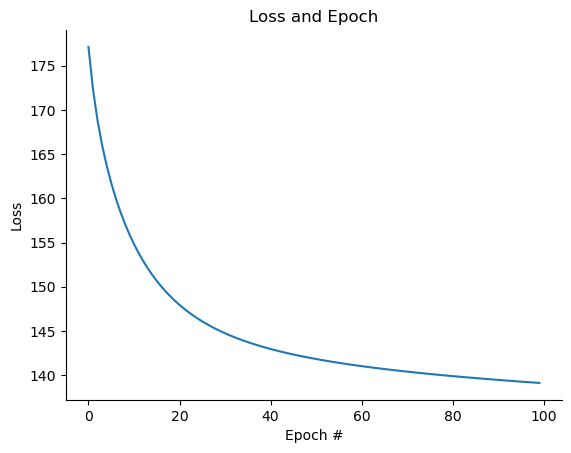

In [34]:
logreg = LogisticRegression()
loss = logreg.train(nba_new_X_val, nba_new_Y_val)
loss = np.asarray(loss).flatten()

fig,ax = plt.subplots()
ax.plot(loss)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch #')
ax.set_title('Loss and Epoch')
sns.despine()
plt.show()

### 3.5 Hyperparameter Tuning via Random Search

Parameter ranges:

- α ∈ (0, 1): L2 regularization strength
- η ∈ (0, 0.001): Learning rate
- t ∈ (0, 100): Number of epochs


 20 random searches
 
Evaluation: Validation set accuracy

In [35]:
score = 0
best_param = [0,0,0]

for i in range(21):
    alpha = np.random.choice([0, 0.25, 0.5, 0.75, 1.0])
    eta = np.random.uniform(low=0.001, high=0)
    t = np.random.randint(low=0,high=100)
    templr = LogisticRegression(alpha, t, eta)
    templr.train(nba_new_X_val, nba_new_Y_val)
    nba_new_Y_predict = templr.predict(nba_new_X_test)
    temp_score = accuracy_score(nba_new_Y_test, nba_new_Y_predict)*100
    if(temp_score > score):
        best_param = [alpha, t, eta]
        score = temp_score

print("### Best Hyperparameters Result ###")
print("Best Accuracy Score (Test Set): %f;" % (score))
print("alpha: %.2f; t: %.2f; eta: %f" % (best_param[0], best_param[1], best_param[2]))

### Best Hyperparameters Result ###
Best Accuracy Score (Test Set): 75.187970;
alpha: 0.50; t: 76.00; eta: 0.000103


### 3.6 Model Comparison

Test set accuracy comparison:

- Initial model (A)
- Optimized model (B)


Analysis of performance differences

In [36]:
logreg = LogisticRegression()
logreg.train(nba_new_X_val, nba_new_Y_val)
nba_new_Y_predict = logreg.predict(nba_new_X_test)
score = accuracy_score(nba_new_Y_test, nba_new_Y_predict)*100
print("### Accuracy Test - Part A ###")
print("Accuracy Score (Test Set): %f;" % (score))
print("alpha: 0; t: 100; eta: 0.001;")

### Accuracy Test - Part A ###
Accuracy Score (Test Set): 68.796992;
alpha: 0; t: 100; eta: 0.001;


#### Analysis 

The improved performance observed in Part B compared to Part A can be attributed to several factors:

Hyperparameter optimization: The random search explores a range of hyperparameters, allowing the model to find a more suitable configuration for the specific dataset.
Regularization: Part B introduces the α parameter for L2 regularization, which can help prevent overfitting and improve generalization.
Adaptive learning rate: By searching different η values, the model can find a more appropriate learning rate, potentially leading to better convergence.
Flexible training duration: Varying the number of epochs (t) allows the model to find an optimal training time, balancing between underfitting and overfitting.
Dataset-specific tuning: The random search helps identify hyperparameters that are well-suited to the particular characteristics of the NBA dataset.
Balancing bias-variance trade-off: The combination of different hyperparameters allows the model to find a better balance between model complexity and generalization ability.

This outcome underscores the importance of hyperparameter tuning in machine learning, as even a simple model like logistic regression can significantly benefit from optimized parameters.

### 3.7 Model Weights

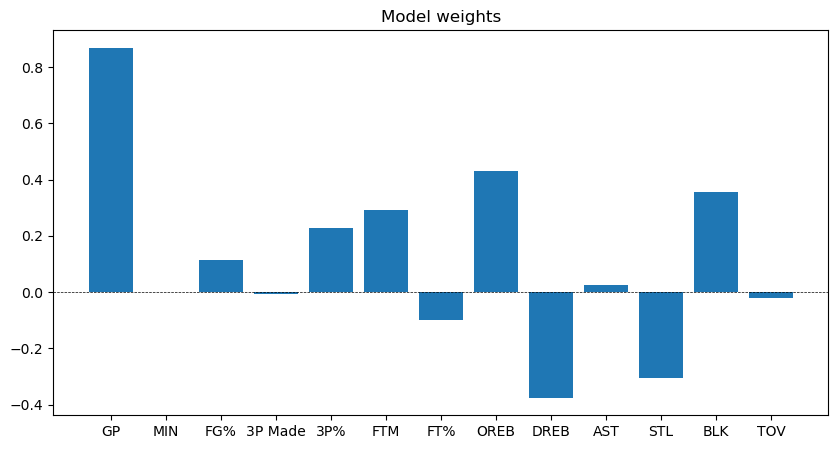

In [37]:
nba_features = list(nba_new_X.columns)
feature_weights = logreg.w.ravel()[1:]

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(nba_features, feature_weights)
ax.axhline(color='black', linewidth='0.5', linestyle='--')
ax.set_title('Model weights')
plt.show()


- GP (Games Played) as dominant weight:

    This suggests that a player's availability and experience over a season strongly influences the model's predictions.
It may indicate that consistent participation is a key factor in overall player performance or value.


- OREB (Offensive Rebounds) and DREB (Defensive Rebounds) as important contributors:

    Rebounding ability on both ends of the court appears to be a significant predictor in the model.
This highlights the importance of a player's ability to secure possessions for their team.


- BLK (Blocks) as another key feature:

    The prominence of blocks indicates that defensive presence, particularly in protecting the rim, is valued highly by the model.


- Overall feature importance distribution:

    The model seems to value a mix of availability (GP) and specific on-court contributions (rebounds and blocks).
    This distribution suggests a balanced approach in evaluating player impact.

## 4. Support Vector Machines

Task: Classify Breast Cancer (569x31) samples as benign (B) or malignant (M) using 30 continuous features from FNA images

In [38]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
# Split data into features and labels
cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

### 4.1 Data Preprocessing

1. Encode categorical labels: 0 (B), 1 (M)
2. Convert labels from Pandas series to Numpy (m x 1) vector to prevent broadcasting issues in logistic regression
3. Dataset split: 60% training, 20% validation, 20% test
4. Standardize feature matrices (cancer_X_train, cancer_X_val, cancer_X_test):
   - Calculate mean and variance from cancer_X_train
   - Apply to all sets to avoid information leakage
5. Add column of ones to feature matrices for bias term in linear model

In [40]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### 4.2 Train, Predict and Evaluate Primal SVM

In [41]:
lsvc = LinearSVC()
lsvc.fit(cancer_X_train, cancer_y_train.ravel())

cancer_y_predict = lsvc.predict(cancer_X_test)

cancer_y_hat_train = lsvc.predict(cancer_X_train)
cancer_y_hat_val = lsvc.predict(cancer_X_val)

print("### Accuracy Score ###")
print("training set| validation set | test set")
print("%.2f | %.2f | %.2f" % (accuracy_score(cancer_y_train, cancer_y_hat_train)*100, 
accuracy_score(cancer_y_val, cancer_y_hat_val)*100, 
accuracy_score(cancer_y_test, cancer_y_predict)*100))
print("")


### Accuracy Score ###
training set| validation set | test set
99.12 | 92.98 | 94.74



### 4.3 Train, Predict and Evaluate Dual SVM

In [42]:
svc = SVC( kernel = 'linear' )
svc.fit(cancer_X_train, cancer_y_train.ravel())

cancer_y_predict = svc.predict(cancer_X_test)

cancer_y_hat_train = svc.predict(cancer_X_train)
cancer_y_hat_val = svc.predict(cancer_X_val)

print("### Accuracy Score ###")
print("training set| validation set | test set")
print("%.2f | %.2f | %.2f" % (accuracy_score(cancer_y_train, cancer_y_hat_train)*100, 
accuracy_score(cancer_y_val, cancer_y_hat_val)*100, 
accuracy_score(cancer_y_test, cancer_y_predict)*100))
print("")

### Accuracy Score ###
training set| validation set | test set
99.12 | 94.74 | 96.49



### 4.4 Comparison: Primal SVM vs Dual SVM

Primal SVM:
- Direct optimization in feature space
- Computationally intensive for high-dimensional data
- Easier to interpret weights directly

Dual SVM:
- Optimization in dual space
- Efficient for high-dimensional data
- Enables kernel trick for non-linear boundaries